<a href="https://colab.research.google.com/github/allielabrecque4-debug/Machine-Learning-Labrecque/blob/main/Wind_Turbine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project Progress 4: Wind Turbine Energy Prediction <br> Allie Labrecque <br> 662017931 <br>

This report inlcudes the preliminary results of two different methods: Random Forest Regression and Support Vector Regressor as planned by the Project Proposal. Based on results from Project Progress 3, data filtering is performed to remove unnecessary data points.

In [1]:
# load Wind Turbine Scada dataset from kaggle
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/WindProps.csv'
df = pd.read_csv(csv_path)

# Separate features (wind speed, wind direction, theoretical power) from target (active power)
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = df['LV ActivePower (kW)']
timestamps = df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.3, random_state=42)

Mounted at /content/drive


Random Forest

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [3]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 166188.39846485044
R-squared (R2): 0.9034310766514667


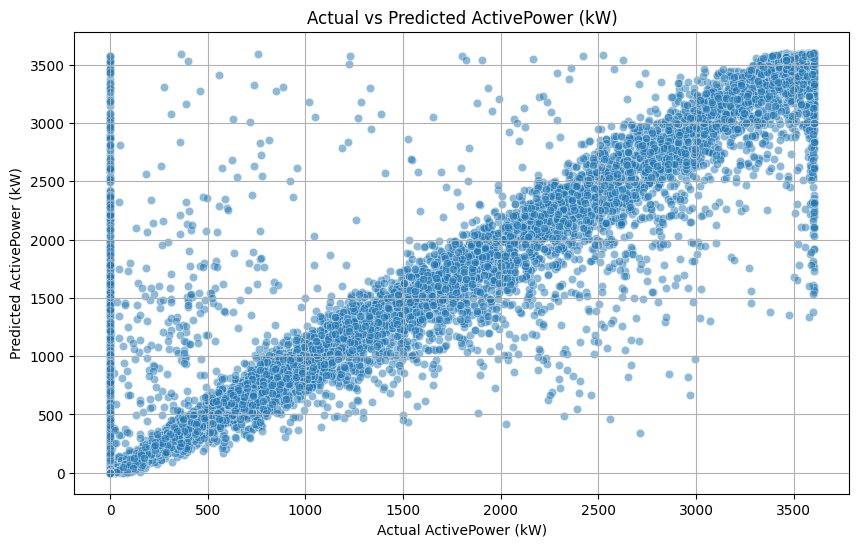

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW)')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

The data points where the active power is zero when the wind speed is high are causing accuracy problems. These data points represent times when the turbine was turned off for maintenance or safety reasons, so it is reasonable to remove them from the data set to more accuractely capture the relationship between active power and the input features. Based on the graph below (Active Power vs. Wind Speed) a cut-off value of about 2 m/s should be implemented.

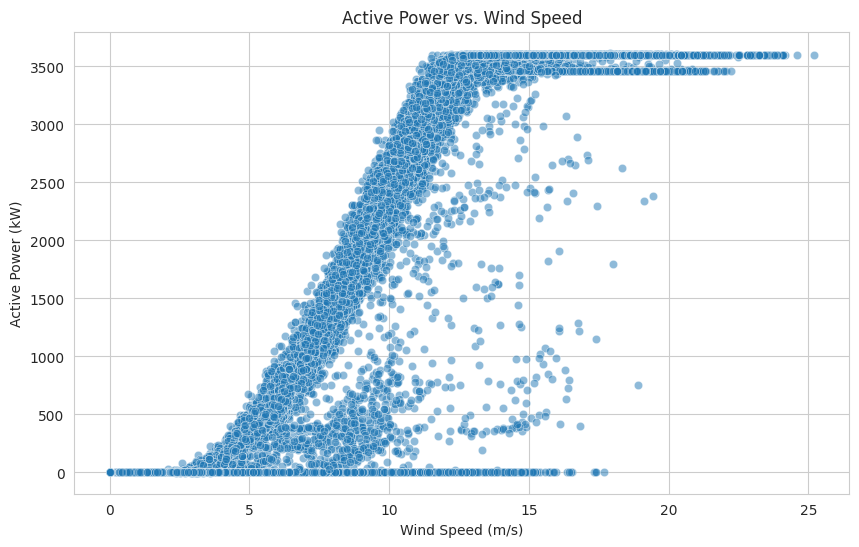

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create scatter plot for Active Power vs. Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.show()

In [30]:
# filter out data points where active power is zero at high wind speeds (times when the turbine is off for maintenance or safety)
filtered_df = df[(df['LV ActivePower (kW)'] > 0) | (df['Wind Speed (m/s)'] <= 2)]

# Separate features (wind speed, wind direction, theoretical power) from target (active power)
X_f = filtered_df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y_f = filtered_df['LV ActivePower (kW)']
timestamps_f = filtered_df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train_f, X_test_f, y_train_f, y_test_f, timestamps_train_f, timestamps_test_f = train_test_split(
    X_f, y_f, timestamps_f, test_size=0.3, random_state=42)



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_f, y_train_f)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [32]:
# Make predictions on the test set
y_pred_f = rf_model.predict(X_test_f)

# Evaluate the model
mse = mean_squared_error(y_test_f, y_pred_f)
r2 = r2_score(y_test_f, y_pred_f)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 63418.83144673654
R-squared (R2): 0.9626203871921324


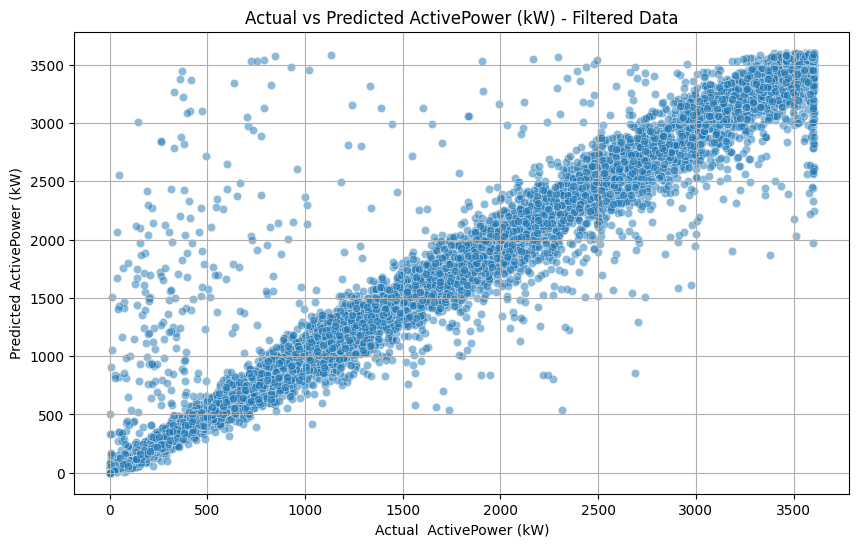

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_f, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - Filtered Data')
plt.xlabel('Actual  ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

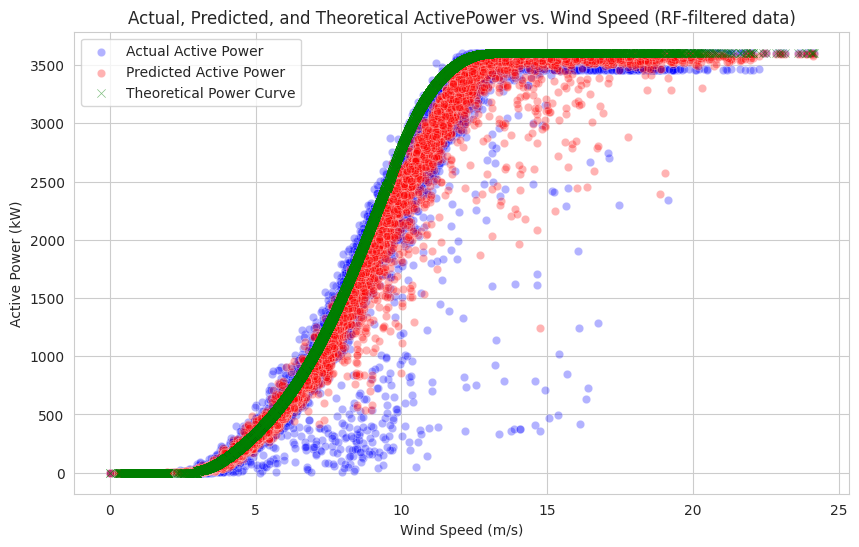

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting from the test set of filtered data
plot_df = pd.DataFrame({
    'Wind Speed (m/s)': X_test_f['Wind Speed (m/s)'],
    'Actual ActivePower (kW)': y_test_f,
    'Predicted ActivePower (kW)': y_pred_f,
    'Theoretical_Power_Curve (KWh)': X_test_f['Theoretical_Power_Curve (KWh)']
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (RF-filtered data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

Using the filtered data in the RF Regression, the R-squared value improved from 0.90 to 0.96 and the MSE improved from 166,188 to 63,418 which correlates to a value of about 250 kW error. However, the model is not perfect and has a tendancy to overpredict power generation at low wind speeds. This could potentially be improved by parameter hypertuning or further data filtering.

Support Vector Regressor (SVR) using the filtered data

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features (X_train_f and X_test_f)
X_train_scaled = scaler_X.fit_transform(X_train_f) # use filtered data
X_test_scaled = scaler_X.transform(X_test_f)

# SVR also often benefits from scaling the target variable (y)
y_train_scaled = scaler_y.fit_transform(y_train_f.values.reshape(-1, 1)).ravel()
# Note: y_test_f is scaled for prediction evaluation but not for training

print("Features and target scaled successfully.")

# Initialize the SVR model
# Using a radial basis function (rbf) kernel is a common choice for non-linear relationships.
# C and epsilon are important hyperparameters to tune for SVR.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

# Train the model on the scaled training data
print("Training SVR model...")
svr_model.fit(X_train_scaled, y_train_scaled)
print("SVR model training finished.")

Features and target scaled successfully.
Training SVR model...
SVR model training finished.


In [19]:
# Make predictions on the scaled test set
y_pred_scaled_svr = svr_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled_svr.reshape(-1, 1)).ravel()

# Evaluate the model
mse_svr = mean_squared_error(y_test_f, y_pred_svr)
r2_svr = r2_score(y_test_f, y_pred_svr)

print(f"Mean Squared Error (MSE) for SVR: {mse_svr}")
print(f"R-squared (R2) for SVR: {r2_svr}")

Mean Squared Error (MSE) for SVR: 63173.36000808659
R-squared (R2) for SVR: 0.9627650702006774


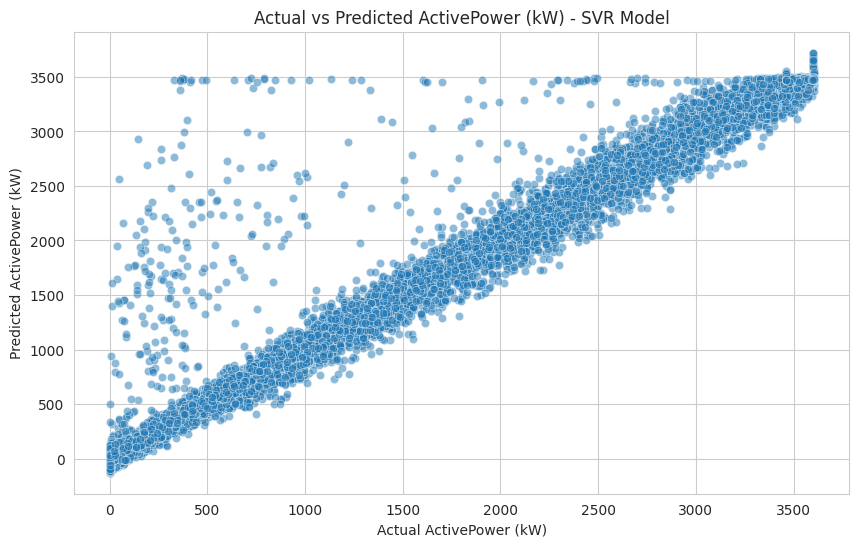

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values for the SVR model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_svr, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - SVR Model')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

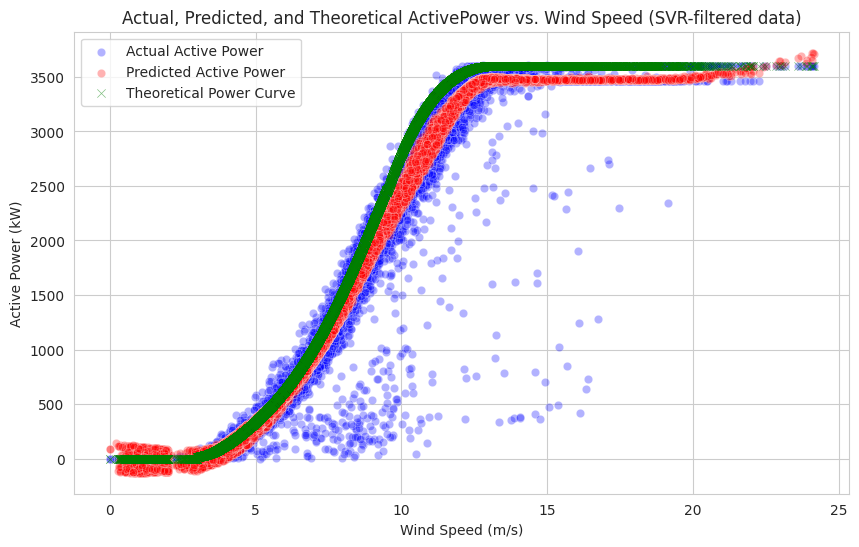

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting from the test set of filtered data
plot_df = pd.DataFrame({
    'Wind Speed (m/s)': X_test_f['Wind Speed (m/s)'],
    'Actual ActivePower (kW)': y_test_f,
    'Predicted ActivePower (kW)': y_pred_svr,
    'Theoretical_Power_Curve (KWh)': X_test_f['Theoretical_Power_Curve (KWh)']
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (SVR-filtered data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

The RF and SVR models have the same R-Squared value of 0.963 and no meaningful difference between the values of MSE. The SVR has the same problem as RF, struggling with the data points at low wind speeds. Parametrer hypertuning will also be conducted for SVR, specifically the "c" and "epsilon" parameters.